# ATTAXML: Behaviour-Based Prediction of MITRE ATT&CK Techniques in Ransomware with Extreme Multi-Label Learning

This code provides the implementation of our work.

In [ ]:
# Library imports
import pandas as pd
import numpy as np

import os
import sys

## Preparing the Dataset

### MLRan MITRE Dataset

Here we load the MLRan MITRE dataset which contains the MITRE tactics-technique pair for each sample.

In [4]:
df_labels = pd.read_csv('dataset/mlran_mitre_pivot_dataset.csv')
df_labels.head()

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df_labels.shape

(3676, 261)

### Load the time-aware splitting ids

The following contains the sample metadata based on time-aware splitting for training and testing. 

In [6]:
# MITRE MLRan Training Dataset Labels

ids_train_mitre = pd.read_csv('dataset/time_aware_splitting/train_ransomware.csv')
print(ids_train_mitre.shape)
display(ids_train_mitre.head())

print("Test")
ids_test_mitre = pd.read_csv('dataset/time_aware_splitting/test_ransomware.csv')
print(ids_test_mitre.shape)
display(ids_test_mitre.head())


(1315, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,10030,0dbcc6654ed9f3dc456203d4602a2136ae53f9f44adf36...,1,reveton,5,locker,1,0db168366b9ae15b7b868e32abdadb491bcbcfdc,fe778ea756169a05d3e7ae72100b1978,dll,49/54,elderan,2012:03:07,2012-03-07,2012:03:07,2012,1331159096,2012-03-07,2012
1,10235,68a3454d0cbdbd7a39ce0d99503d46a75e2917c6e6d4ae...,1,reveton,5,locker,1,62ab97c1710d8213cf7924c7d3c4eaa3fd6af5d1,087d86235891edbcc02eab6880143aa5,dll,37/44,elderan,2012:06:22,2012-06-22,2012:06:22,2012,1340407285,2012-06-22,2012
2,10569,fd2e530fc85c63f34c3a943efcc3ac8e6649a59d1d8d33...,1,reveton,5,locker,1,0560abe3c6ce071c7d545035a117b1d8c1eab2d1,3d6064113bd4fe6b1c3d1214db4199e5,dll,22/42,elderan,2012:02:05,2012-02-05,2012:02:05,2012,1340995596,2012-06-29,2012
3,10124,38dd960336435ae9d70cf965fcef6b776d9f27adf1ffce...,1,reveton,5,locker,1,c39babb05db105066c1fadb63348fa1077f72b02,f95eb0adbf1b5ff68b34de2170b16bc0,exe,39/54,elderan,2009:04:03,2009-04-03,2009:04:03,2009,1370691817,2013-06-08,2013
4,10019,07fd37ab73c9f05316d36a4a3107a3d91a18b31baee7c7...,1,matsnu,11,locker,1,2bfb7d48832a0332c9cc3e10479ae32287f32d5f,fb665637e25d9b856e635d52512fb320,zip,38/54,elderan,1992:06:19,1992-06-19,NaN,1992,1371632587,2013-06-19,2013


Test
(330, 19)


,sample_id,sha256,sample_type,ransomware_family,family_label,ransomware_type,type_label,sha1,md5,extension,detections,source,timestamp,new_timestamp,old_timestamp,Year,first_submission_date,first_submission_date_converted,first_submission_date_year
0,11064,bd58bbed0f6081c17f8f68020c98df0b24ca05f4cf4399...,1,mbrlock,8,locker,1,01a6bded40b3d3cf5adcd789d5bfab46abed8258,fe4947d1e9321c1267dc2ba2c7bc62f4,exe,60/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635931107,2021-11-03,2021
1,11090,c1e8ad28a060b819ce13c3f64cd5ce095e0b33d2fccb8e...,1,mbrlock,8,locker,1,843dbfac37369d576d449fb2c9e4449486098821,ecdb6d3729eafaf93bda08171bcd53f5,exe,56/74,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927144,2021-11-03,2021
2,11181,2b0ac6d5fb859e0905659403c657da07eb195f39055274...,1,mbrlock,8,locker,1,2c1a880082308fe160219ae784d60c4f7df2fdfa,10cacf48b566c9dbf850cb82eed5a3b5,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635931522,2021-11-03,2021
3,11095,6b2b02279cf38167ec17968dfe70b17faab4c5b7c634c6...,1,mbrlock,8,locker,1,326e0859fac752dc9ea967a09f0ae6f3bbcaa390,6d47e9551d93b1c2a106671d6684080a,exe,59/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635927524,2021-11-03,2021
4,11393,703b8043f979d448121fe690a90dc802e5ccc916739916...,1,mbrlock,8,locker,1,ba4aa7f817cf72b7b1b4c77dc8bc3cfa192939a0,68ded010310fb353a1e83e6536dd337d,exe,58/75,marauder,708992537.0,1992-06-19,708992537.0,1992,1635930151,2021-11-03,2021


In [7]:
ids_test_mitre.shape[0] + ids_train_mitre.shape[0]

1645

In [8]:
# Now we have to use the ids_train_mitre and ids_test_mitre to filter the df_labels
df_labels_train = df_labels[df_labels['sample_id'].isin(ids_train_mitre['sample_id'])]
df_labels_test = df_labels[df_labels['sample_id'].isin(ids_test_mitre['sample_id'])]
# Check the shape of the filtered labels
print("Train Labels Shape:", df_labels_train.shape)
print("Test Labels Shape:", df_labels_test.shape)
# Check the first few rows of the filtered labels
display(df_labels_train.head())
display(df_labels_test.head())

Train Labels Shape: (1315, 261)
Test Labels Shape: (330, 261)


,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
559,11064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,11090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585,11095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,11100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,11106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Load MLRan Behavioural Dataset

In [9]:
MLRan_train = pd.read_csv('dataset/MLRan_X_train_RFE.csv')
print(MLRan_train.shape)
display(MLRan_train.head())

(3905, 487)


,sample_id,sample_type,family_label,type_label,5,8,18,32,33,34,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,3,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,12,2,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10003,1,3,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10004,1,9,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,11,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [10]:
X_MLRan_test = pd.read_csv('dataset/MLRan_X_test_RFE.csv')
print(X_MLRan_test.shape)
display(X_MLRan_test.head())

(975, 487)


,sample_id,sample_type,family_label,type_label,5,8,18,32,33,34,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,11027,1,8,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,1,1
1,11030,1,31,2,1,0,1,0,1,1,...,0,1,0,0,0,0,1,0,1,1
2,11033,1,8,1,1,1,1,1,1,1,...,1,0,1,1,0,0,0,0,1,1
3,11035,1,8,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,1,1
4,11036,1,3,2,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [11]:
MLRan = pd.concat([MLRan_train, X_MLRan_test], axis=0)
print("Combined MLRan Shape:", MLRan.shape)
display(MLRan.head())

Combined MLRan Shape: (4880, 487)


,sample_id,sample_type,family_label,type_label,5,8,18,32,33,34,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,3,2,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,12,2,1,1,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,10003,1,3,2,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10004,1,9,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,11,1,1,1,1,1,1,1,...,1,1,1,1,0,0,1,0,0,0


In [12]:
# Dropping labels from MLRan_train
MLRan = MLRan.drop(columns=['sample_type', 'family_label', 'type_label'])

display(MLRan.head())

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10003,0,0,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,1,0,1,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0


In [13]:
# Now we filter the MLRan DataFrame to keep only the sample_ids present in df_labels_train
X_train = MLRan[MLRan['sample_id'].isin(df_labels_train['sample_id'])]

# Check the shape of the filtered MLRan
print("Filtered MLRan Train Shape:", X_train.shape)

# Check the first few rows of the filtered MLRan
display(X_train.head())

Filtered MLRan Train Shape: (1315, 484)


,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
7,10008,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
# Now we filter the MLRan DataFrame to keep only the sample_ids present in df_labels_test
X_test = MLRan[MLRan['sample_id'].isin(df_labels_test['sample_id'])]

# Check the shape of the filtered MLRan
print("Filtered MLRan Test Shape:", X_test.shape)

# Check the first few rows of the filtered MLRan
display(X_test.head())

Filtered MLRan Test Shape: (330, 484)


,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
1049,11170,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1051,11172,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1053,11175,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1054,11176,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,11177,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
Y_train = df_labels_train
Y_test = df_labels_test

In [16]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
display("X_train:", X_train.head())
display("Y_train:", Y_train.head())
display("X_train:", X_train.tail())
display("Y_train:", Y_train.tail())

X_train shape: (1315, 484)
Y_train shape: (1315, 261)


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,10005,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
7,10008,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
18,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
214,11479,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
264,11830,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
265,11831,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
266,11832,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
267,11834,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
1640,12527,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1641,12528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1642,12529,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1643,12530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1644,12531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
# Check Row Count Equality
if X_train.shape[0] != Y_train.shape[0]:
    raise ValueError("Row count mismatch between X_train and Y_train")


In [18]:
#  Check Alignment via Identifier
assert (X_train['sample_id'] == Y_train['sample_id']).all(), "Sample IDs in X_train and Y_train do not match"


ValueError: Can only compare identically-labeled Series objects

In [19]:
# Sort both DataFrames by sample_id
X_train_sorted = X_train.sort_values(by='sample_id').reset_index(drop=True)
Y_train_sorted = Y_train.sort_values(by='sample_id').reset_index(drop=True)

# confirm that sample_id columns match exactly
assert (X_train_sorted['sample_id'] == Y_train_sorted['sample_id']).all(), "Mismatch in sample_id after sorting"


In [20]:
print("X_train shape:", X_train_sorted.shape)
print("Y_train shape:", Y_train_sorted.shape)
display("X_train:", X_train_sorted.head())
display("Y_train:", Y_train_sorted.head())
display("X_train:", X_train_sorted.tail())
display("Y_train:", Y_train_sorted.tail())

X_train shape: (1315, 484)
Y_train shape: (1315, 261)


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10005,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
3,10008,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
1310,12527,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1311,12528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1312,12529,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,12530,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,12531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
1310,12527,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1311,12528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1312,12529,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,12530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,12531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
display("X_test:", X_test.head())
display("Y_test:", Y_test.head())
display("X_test:", X_test.tail())
display("Y_test:", Y_test.tail())

X_test shape: (330, 484)
Y_test shape: (330, 261)


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
1049,11170,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1051,11172,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1053,11175,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1054,11176,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1055,11177,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
559,11064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,11090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
585,11095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
590,11100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
595,11106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
459,12517,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
461,12519,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
462,12520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
463,12521,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
464,12522,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
1633,12520,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1634,12521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1635,12522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1638,12525,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
1639,12526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# Check Row Count Equality
assert len(X_test) == len(Y_test), "X_test and Y_test have different number of rows"


In [23]:
# confirm that sample_id columns match exactly
assert (X_test['sample_id'] == Y_test['sample_id']).all(), "Mismatch in sample_id between X_test and Y_test"


ValueError: Can only compare identically-labeled Series objects

In [24]:
# Sort both DataFrames by sample_id
X_test_sorted = X_test.sort_values(by='sample_id').reset_index(drop=True)
Y_test_sorted = Y_test.sort_values(by='sample_id').reset_index(drop=True)

# confirm that sample_id columns match exactly
assert (X_test_sorted['sample_id'] == Y_test_sorted['sample_id']).all(), "Mismatch in sample_id after sorting"


In [25]:
print("X_test shape:", X_test_sorted.shape)
print("Y_test shape:", Y_test_sorted.shape)
display("X_test:", X_test_sorted.head())
display("Y_test:", Y_test_sorted.head())
display("X_test:", X_test_sorted.tail())
display("Y_test:", Y_test_sorted.tail())

X_test shape: (330, 484)
Y_test shape: (330, 261)


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,11064,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
1,11090,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
2,11095,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11100,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
4,11106,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,11064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
325,12520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,12521,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
327,12522,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
328,12525,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
329,12526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
325,12520,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
326,12521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
327,12522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,12525,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
329,12526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# # Save all the dataframes to csv files
# X_train_sorted.to_csv('dataset/formated_data_ransomware/MLRan_X_train_RFE_R.csv', index=False)
# X_test_sorted.to_csv('dataset/formated_data_ransomware/MLRan_X_test_RFE_R.csv', index=False)
# Y_train_sorted.to_csv('dataset/formated_data_ransomware/MITRE_y_train_R.csv', index=False)
# Y_test_sorted.to_csv('dataset/formated_data_ransomware/MITRE_y_test_R.csv', index=False)

## Modelling

In [ ]:
# Library imports
from sklearn.linear_model import LogisticRegression
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import ndcg_score
import skmultilearn

from tqdm.notebook import tqdm
from sklearn.preprocessing import MultiLabelBinarizer

from sklearn.ensemble import RandomForestClassifier
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.neural_network import MLPClassifier
import time

from sklearn.dummy import DummyClassifier
from scipy.sparse import csr_matrix

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load datasets
X_train = pd.read_csv('dataset/formated_data_ransomware/MLRan_X_train_RFE_R.csv') 
X_test = pd.read_csv('dataset/formated_data_ransomware/MLRan_X_test_RFE_R.csv')
Y_train = pd.read_csv('dataset/formated_data_ransomware/MITRE_y_train_R.csv')
Y_test = pd.read_csv('dataset/formated_data_ransomware/MITRE_y_test_R.csv')

In [5]:
# confirm that sample_id columns match exactly
assert (X_train['sample_id'] == Y_train['sample_id']).all(), "Mismatch in sample_id after sorting"

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
display("X_train:", X_train.head())
display("Y_train:", Y_train.head())
display("X_train:", X_train.tail())
display("Y_train:", Y_train.tail())

X_train shape: (1315, 484)
Y_train shape: (1315, 261)


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,10001,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,10002,1,1,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,10005,1,1,1,1,1,1,1,1,0,...,1,1,1,1,0,0,1,0,0,0
3,10008,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,10001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10008,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,10019,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_train:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
1310,12527,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1311,12528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1312,12529,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,12530,0,1,1,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,12531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_train:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
1310,12527,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1311,12528,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1312,12529,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1313,12530,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1314,12531,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# confirm that sample_id columns match exactly
assert (X_test['sample_id'] == Y_test['sample_id']).all(), "Mismatch in sample_id after sorting"

print("X_test shape:", X_test.shape)
print("Y_test shape:", Y_test.shape)
display("X_test:", X_test.head())
display("Y_test:", Y_test.head())
display("X_test:", X_test.tail())
display("Y_test:", Y_test.tail())

X_test shape: (330, 484)
Y_test shape: (330, 261)


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
0,11064,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
1,11090,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
2,11095,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,11100,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1
4,11106,1,1,1,1,1,1,0,1,1,...,1,0,1,1,0,0,0,0,1,1


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
0,11064,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,11090,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,11095,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,11100,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,11106,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'X_test:'

,sample_id,5,8,18,32,33,34,35,37,41,...,6468165,6468166,6468169,6468170,6468193,6468195,6468200,6468202,6468204,6468211
325,12520,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
326,12521,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
327,12522,0,1,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1
328,12525,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
329,12526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


'Y_test:'

,sample_id,TA0001:T1078,TA0001:T1091,TA0001:T1133,TA0001:T1190,TA0001:T1566,TA0001:T1566.002,TA0002:T1047,TA0002:T1053,TA0002:T1053.002,...,TA0040:T1499.001,TA0040:T1529,TA0040:T1531,TA0040:T1561,TA0040:T1561.002,TA0040:T1565,TA0043:T1590,TA0043:T1590.005,TA0043:T1592,TA0043:T1595
325,12520,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
326,12521,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
327,12522,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
328,12525,0,0,0,0,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,0
329,12526,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# Identify columns with a single unique value
constant_labels = Y_train.loc[:, Y_train.nunique() == 1]

# Extract their constant values
constant_label_values = constant_labels.apply(lambda col: col.unique()[0])

# Display result
print(f"Number of constant labels: {constant_label_values.shape[0]}")
print("Constant labels and their values:")
print(constant_label_values)


Number of constant labels: 16
Constant labels and their values:
TA0003:T1136        0
TA0003:T1546.010    0
TA0003:T1546.012    0
TA0003:T1547.014    0
TA0004:T1134.004    0
TA0004:T1546.010    0
TA0004:T1546.012    0
TA0004:T1547.014    0
TA0005:T1134.004    0
TA0005:T1564.002    0
TA0006:T1552.004    0
TA0007:T1069        0
TA0011:T1132        0
TA0011:T1568        0
TA0040:T1561        0
TA0040:T1561.002    0
dtype: int64


In [8]:

# Drop constant labels from Y_train and Y_test
Y_train = Y_train.drop(columns=constant_labels.columns)
Y_test = Y_test.drop(columns=constant_labels.columns)
# Display the shapes of the filtered DataFrames
print("Filtered Y_train shape:", Y_train.shape)
print("Filtered Y_test shape:", Y_test.shape)


Filtered Y_train shape: (1315, 245)
Filtered Y_test shape: (330, 245)


In [9]:
# Drop sample_id if present
if 'sample_id' in Y_train.columns:
    Y_train = Y_train.drop(columns=['sample_id'])
if 'sample_id' in Y_test.columns:
    Y_test = Y_test.drop(columns=['sample_id'])
if 'sample_id' in X_train.columns:
    X_train = X_train.drop(columns=['sample_id'])
if 'sample_id' in X_test.columns:
    X_test = X_test.drop(columns=['sample_id'])

# Convert to NumPy arrays
X_train_arr = X_train.values
X_test_arr = X_test.values
Y_train_arr = Y_train.values
Y_test_arr = Y_test.values

In [10]:
X_train_arr

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 1, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1315, 483))

In [11]:
Y_train_arr

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(1315, 244))

In [12]:
print("Unique values in Y_test_arr:", np.unique(Y_test_arr))
print("Unique values in Y_train_arr:", np.unique(Y_train_arr))
print("Unique values in X_test_arr:", np.unique(X_test_arr))
print("Unique values in X_train_arr:", np.unique(X_train_arr))


Unique values in Y_test_arr: [0 1]
Unique values in Y_train_arr: [0 1]
Unique values in X_test_arr: [0 1]
Unique values in X_train_arr: [0 1]


## Random Forest

In [ ]:
start_time = time.time()
clf = BinaryRelevance(RandomForestClassifier())
clf.fit(X_train_arr, Y_train_arr)

end_time = time.time()
print('Training time:', end_time - start_time)
# Prediction
Y_test_pred = clf.predict_proba(X_test_arr).toarray()
print(Y_test_pred)

Training time: 32.76140475273132
[[0.   0.01 0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.01 0.04 0.   ... 0.   0.   0.  ]
 [0.   0.05 0.   ... 0.   0.   0.  ]
 [0.   0.17 0.   ... 0.   0.   0.  ]]


### Evaluation

In [15]:
# Define evaluation functions
def top_k_preds(pred_scores, k):
    top_k = np.argsort(-pred_scores, axis=1)[:, :k]
    Y_pred_top_k = np.zeros_like(pred_scores)
    for i, row in enumerate(top_k):
        Y_pred_top_k[i, row] = 1
    return Y_pred_top_k, top_k


def precision_at_k(Y_true, Y_scores, k):
    Y_pred_top_k, _ = top_k_preds(Y_scores, k)
    true_positives = (Y_pred_top_k * Y_true).sum(axis=1)
    per_instance_precision = true_positives / k
    return np.mean(per_instance_precision)


def recall_at_k(Y_true, Y_scores, k):
    Y_pred_top_k, _ = top_k_preds(Y_scores, k)
    true_positives = (Y_pred_top_k * Y_true).sum(axis=1)
    actual_positives = Y_true.sum(axis=1)
    per_instance_recall = true_positives / (actual_positives + 1e-10)
    return np.mean(per_instance_recall)


def f1_at_k(Y_true, Y_scores, k):
    p = precision_at_k(Y_true, Y_scores, k)
    r = recall_at_k(Y_true, Y_scores, k)
    return 2 * p * r / (p + r + 1e-10)

def ndcg_at_k(Y_true, Y_scores, k):
    scores = []
    for i in range(Y_true.shape[0]):
        true = Y_true[i]
        score = Y_scores[i]
        scores.append(ndcg_score([true], [score], k=k))
    return np.mean(scores)

def coverage_at_k(Y_scores, k):
    _, top_k_labels = top_k_preds(Y_scores, k)
    unique_labels = np.unique(top_k_labels.flatten())
    return len(unique_labels) / Y_scores.shape[1]

def tail_label_accuracy(Y_true, Y_pred, label_freq, tail_threshold=20):
    tail_labels = np.where(label_freq < tail_threshold)[0]
    correct = (Y_true[:, tail_labels] & Y_pred[:, tail_labels]).sum()
    total = Y_true[:, tail_labels].sum()
    return correct / (total + 1e-10)


In [16]:
def evaluate_at_k(Y_true, Y_scores, k_values, 
                  precision_fn, recall_fn, f1_fn, ndcg_fn, coverage_fn):
    """
    Evaluate ranking metrics at multiple cutoff levels k.

    Parameters:
    - Y_true: np.ndarray of shape (n_samples, n_labels), ground truth binary labels
    - Y_scores: np.ndarray of shape (n_samples, n_labels), predicted scores
    - k_values: list of integers, values of k for evaluation
    - precision_fn, recall_fn, f1_fn, ndcg_fn, coverage_fn: callable metric functions

    Returns:
    - pd.DataFrame summarising metrics for each k
    """
    metrics_summary = {
        "k": [],
        "Precision": [],
        "Recall": [],
        "F1": [],
        "nDCG": [],
        "Coverage": []
    }

    for k in k_values:
        metrics_summary["k"].append(k)
        metrics_summary["Precision"].append(round(precision_fn(Y_true, Y_scores, k), 4)*100)
        metrics_summary["Recall"].append(round(recall_fn(Y_true, Y_scores, k), 4)*100)
        metrics_summary["F1"].append(round(f1_fn(Y_true, Y_scores, k), 4)*100)
        metrics_summary["nDCG"].append(round(ndcg_fn(Y_true, Y_scores, k), 4)*100)
        metrics_summary["Coverage"].append(round(coverage_fn(Y_scores, k), 4)*100)

    df_metrics = pd.DataFrame(metrics_summary)
    print("Results of Precision, Recall, F1, nDCG, and Coverage for different values of k")
    display(df_metrics)
    return df_metrics


In [33]:
k_vals = [1, 2, 3, 5, 10, 20, 30, 40, 50]

df_metrics = evaluate_at_k(
    Y_true=Y_test_arr,
    Y_scores=Y_test_pred,
    k_values=k_vals,
    precision_fn=precision_at_k,
    recall_fn=recall_at_k,
    f1_fn=f1_at_k,
    ndcg_fn=ndcg_at_k,
    coverage_fn=coverage_at_k
)

Results of Precision, Recall, F1, nDCG, and Coverage for different values of k


,k,Precision,Recall,F1,nDCG,Coverage
0,1,94.24,11.56,20.59,94.60,8.61
1,2,93.48,23.42,37.45,93.78,13.52
2,3,90.20,30.56,45.65,93.60,16.80
3,5,81.33,38.49,52.25,91.59,22.13
4,10,69.61,51.41,59.14,88.79,35.66
5,20,55.68,67.25,60.92,84.78,53.69
6,30,47.11,76.49,58.31,83.95,62.30
7,40,40.77,83.05,54.69,84.59,74.59
8,50,35.05,86.28,49.85,85.66,82.79


In [34]:
df_metrics2 = df_metrics.copy()
df_metrics2.drop(columns=['Coverage'], inplace=True)
df_metrics2

,k,Precision,Recall,F1,nDCG
0,1,94.24,11.56,20.59,94.60
1,2,93.48,23.42,37.45,93.78
2,3,90.20,30.56,45.65,93.60
3,5,81.33,38.49,52.25,91.59
4,10,69.61,51.41,59.14,88.79
5,20,55.68,67.25,60.92,84.78
6,30,47.11,76.49,58.31,83.95
7,40,40.77,83.05,54.69,84.59
8,50,35.05,86.28,49.85,85.66


In [35]:
df_metrics2

,k,Precision,Recall,F1,nDCG
0,1,94.24,11.56,20.59,94.60
1,2,93.48,23.42,37.45,93.78
2,3,90.20,30.56,45.65,93.60
3,5,81.33,38.49,52.25,91.59
4,10,69.61,51.41,59.14,88.79
5,20,55.68,67.25,60.92,84.78
6,30,47.11,76.49,58.31,83.95
7,40,40.77,83.05,54.69,84.59
8,50,35.05,86.28,49.85,85.66


### Visualisation of evaluation results

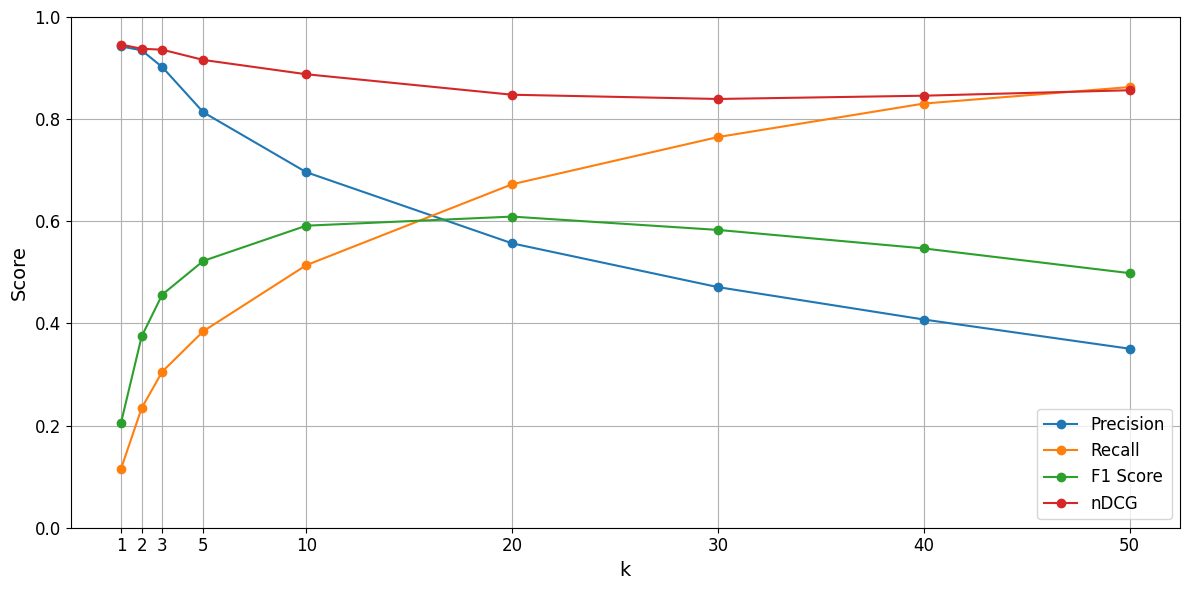

In [ ]:
# Convert percentages to 0-1 scale for plotting
df_metrics_plot = df_metrics2.copy()
metrics = ["Precision", "Recall", "F1", "nDCG"]
df_metrics_plot[metrics] = df_metrics_plot[metrics] / 100.0

# Plot all metrics
plt.figure(figsize=(12, 6))
plt.plot(df_metrics_plot["k"], df_metrics_plot["Precision"], marker='o', label='Precision')
plt.plot(df_metrics_plot["k"], df_metrics_plot["Recall"], marker='o', label='Recall')
plt.plot(df_metrics_plot["k"], df_metrics_plot["F1"], marker='o', label='F1 Score')
plt.plot(df_metrics_plot["k"], df_metrics_plot["nDCG"], marker='o', label='nDCG')

# Formatting
# plt.title('XML Evaluation Metrics at Different k', fontsize=16)
plt.xlabel('k', fontsize=14)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.0)
plt.xticks(df_metrics_plot["k"], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Save to files
output_folder = "results"
png_path = os.path.join(output_folder, "dt_xml_metrics_plot.png")
pdf_path = os.path.join(output_folder, "dt_xml_metrics_plot.pdf")
plt.savefig(png_path, format='png', dpi=300)
plt.savefig(pdf_path, format='pdf')

plt.show()


In [40]:
clf

BinaryRelevance(classifier=RandomForestClassifier(), require_dense=[True, True])

In [41]:
clf.classifiers_

[RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 RandomForestClassifier(),
 

In [42]:
len(clf.classifiers_)

244

In [44]:
# label names
label_names = Y_train.columns.tolist()
print("Label names:", label_names)

Label names: ['TA0001:T1078', 'TA0001:T1091', 'TA0001:T1133', 'TA0001:T1190', 'TA0001:T1566', 'TA0001:T1566.002', 'TA0002:T1047', 'TA0002:T1053', 'TA0002:T1053.002', 'TA0002:T1053.005', 'TA0002:T1059', 'TA0002:T1059.001', 'TA0002:T1059.003', 'TA0002:T1064', 'TA0002:T1106', 'TA0002:T1129', 'TA0002:T1203', 'TA0002:T1204', 'TA0002:T1204.002', 'TA0002:T1559', 'TA0002:T1559.001', 'TA0002:T1569', 'TA0002:T1569.002', 'TA0003:T1037', 'TA0003:T1037.005', 'TA0003:T1053', 'TA0003:T1053.002', 'TA0003:T1053.005', 'TA0003:T1078', 'TA0003:T1098', 'TA0003:T1133', 'TA0003:T1176', 'TA0003:T1197', 'TA0003:T1542', 'TA0003:T1542.001', 'TA0003:T1542.003', 'TA0003:T1543', 'TA0003:T1543.002', 'TA0003:T1543.003', 'TA0003:T1546', 'TA0003:T1546.001', 'TA0003:T1547', 'TA0003:T1547.001', 'TA0003:T1547.004', 'TA0003:T1547.006', 'TA0003:T1547.008', 'TA0003:T1547.009', 'TA0003:T1574', 'TA0003:T1574.001', 'TA0003:T1574.002', 'TA0003:T1574.010', 'TA0004:T1037', 'TA0004:T1037.005', 'TA0004:T1053', 'TA0004:T1053.002', 'T

In [45]:
# Feature names
feature_names_num = X_train.columns.tolist()
print("Feature names:", feature_names_num)

Feature names: ['5', '8', '18', '32', '33', '34', '35', '37', '41', '43', '46', '47', '49', '50', '59', '60', '63', '64', '65', '66', '69', '71', '75', '87', '90', '92', '94', '98', '108', '109', '111', '113', '114', '116', '118', '119', '120', '122', '124', '130', '131', '133', '134', '135', '136', '148', '150', '155', '157', '158', '159', '163', '171', '178', '180', '186', '193', '195', '198', '203', '208', '225', '227', '31844', '35566', '39482', '39484', '40471', '40473', '40475', '40479', '40480', '40481', '40676', '40714', '40716', '40753', '100647', '104290', '104300', '110219', '110220', '112411', '113636', '113637', '119780', '120873', '120874', '120875', '124264', '130140', '131181', '131375', '131394', '131400', '131425', '140099', '140100', '140101', '147738', '147744', '147745', '147746', '147747', '147748', '147762', '152555', '153169', '153296', '153297', '153298', '153299', '153300', '153301', '153302', '153303', '153304', '153305', '153306', '153307', '153308', '153309

In [46]:
import json

# Define the path to your JSON file
json_path = 'dataset/RFE_selected_feature_names_dic.json'

# Open and load the JSON file
with open(json_path, 'r') as file:
    rfe_selected_features = json.load(file)

# Display the content
print(rfe_selected_features)


{'5': 'API:NtProtectVirtualMemory', '8': 'API:CreateProcessInternalW', '18': 'API:LdrGetProcedureAddress', '32': 'API:CreateActCtxW', '33': 'API:GetNativeSystemInfo', '34': 'API:NtAllocateVirtualMemory', '35': 'API:NtQueryInformationFile', '37': 'API:NtOpenProcess', '41': 'API:CoUninitialize', '43': 'API:Process32NextW', '46': 'API:CreateToolhelp32Snapshot', '47': 'API:RegSetValueExW', '49': 'API:GetSystemMetrics', '50': 'API:NtDelayExecution', '59': 'API:CoCreateInstance', '60': 'API:NtWriteFile', '63': 'API:NtQueryKey', '64': 'API:OpenServiceW', '65': 'API:GetComputerNameW', '66': 'API:RegCreateKeyExA', '69': 'API:SHGetFolderPathW', '71': 'API:RegCreateKeyExW', '75': 'API:NtSetInformationFile', '87': 'API:NtQueryDirectoryFile', '90': 'API:OpenSCManagerW', '92': 'API:RegSetValueExA', '94': 'API:Process32FirstW', '98': 'API:UuidCreate', '108': 'API:FindResourceExW', '109': 'API:RegEnumValueW', '111': 'API:GetFileAttributesExW', '113': 'API:DrawTextExW', '114': 'API:GetFileVersionInfoSi

In [47]:
feature_names_long = rfe_selected_features.values()
feature_names_long = list(feature_names_long)
print("Feature names from JSON:", feature_names_long)

Feature names from JSON: ['API:NtProtectVirtualMemory', 'API:CreateProcessInternalW', 'API:LdrGetProcedureAddress', 'API:CreateActCtxW', 'API:GetNativeSystemInfo', 'API:NtAllocateVirtualMemory', 'API:NtQueryInformationFile', 'API:NtOpenProcess', 'API:CoUninitialize', 'API:Process32NextW', 'API:CreateToolhelp32Snapshot', 'API:RegSetValueExW', 'API:GetSystemMetrics', 'API:NtDelayExecution', 'API:CoCreateInstance', 'API:NtWriteFile', 'API:NtQueryKey', 'API:OpenServiceW', 'API:GetComputerNameW', 'API:RegCreateKeyExA', 'API:SHGetFolderPathW', 'API:RegCreateKeyExW', 'API:NtSetInformationFile', 'API:NtQueryDirectoryFile', 'API:OpenSCManagerW', 'API:RegSetValueExA', 'API:Process32FirstW', 'API:UuidCreate', 'API:FindResourceExW', 'API:RegEnumValueW', 'API:GetFileAttributesExW', 'API:DrawTextExW', 'API:GetFileVersionInfoSizeW', 'API:GetTempPathW', 'API:GetFileVersionInfoW', 'API:LoadResource', 'API:DeviceIoControl', 'API:FindWindowW', 'API:CreateDirectoryW', 'API:GetSystemDirectoryW', 'API:RegEn

In [48]:
def shorten_feature_name(name, max_length=45):
    if len(name) <= max_length:
        return name
    else:
        keep = (max_length - 3) // 2
        return f"{name[:keep]}...{name[-keep:]}"

In [49]:
feature_names = [shorten_feature_name(f) for f in feature_names_long]
print("Feature names:", feature_names)

Feature names: ['API:NtProtectVirtualMemory', 'API:CreateProcessInternalW', 'API:LdrGetProcedureAddress', 'API:CreateActCtxW', 'API:GetNativeSystemInfo', 'API:NtAllocateVirtualMemory', 'API:NtQueryInformationFile', 'API:NtOpenProcess', 'API:CoUninitialize', 'API:Process32NextW', 'API:CreateToolhelp32Snapshot', 'API:RegSetValueExW', 'API:GetSystemMetrics', 'API:NtDelayExecution', 'API:CoCreateInstance', 'API:NtWriteFile', 'API:NtQueryKey', 'API:OpenServiceW', 'API:GetComputerNameW', 'API:RegCreateKeyExA', 'API:SHGetFolderPathW', 'API:RegCreateKeyExW', 'API:NtSetInformationFile', 'API:NtQueryDirectoryFile', 'API:OpenSCManagerW', 'API:RegSetValueExA', 'API:Process32FirstW', 'API:UuidCreate', 'API:FindResourceExW', 'API:RegEnumValueW', 'API:GetFileAttributesExW', 'API:DrawTextExW', 'API:GetFileVersionInfoSizeW', 'API:GetTempPathW', 'API:GetFileVersionInfoW', 'API:LoadResource', 'API:DeviceIoControl', 'API:FindWindowW', 'API:CreateDirectoryW', 'API:GetSystemDirectoryW', 'API:RegEnumKeyExW',

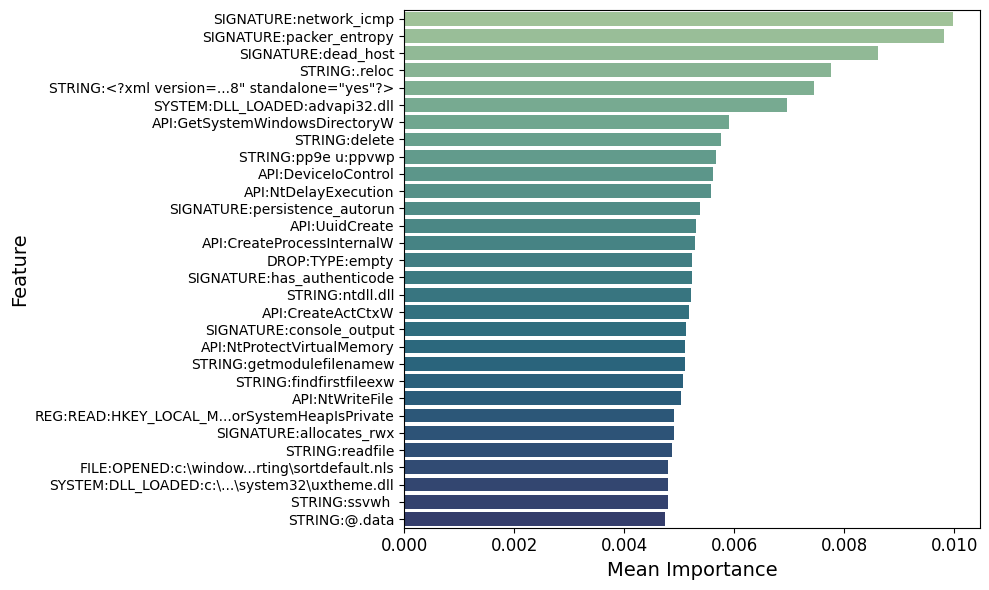

In [ ]:
importances_per_label = []

for i, rf_model in enumerate(clf.classifiers_):
    if hasattr(rf_model, 'feature_importances_'):
        importances = rf_model.feature_importances_
        importance_df = pd.DataFrame({
            'Feature': feature_names,
            'Importance': importances,
            'Label': label_names[i]
        })
        importances_per_label.append(importance_df)

# Concatenate all importances
all_importances = pd.concat(importances_per_label, ignore_index=True)

# Compute mean importance across all labels
mean_importances = all_importances.groupby('Feature')['Importance'].mean().reset_index()

# Select top N features
top_n = 30
top_features = mean_importances.sort_values('Importance', ascending=False).head(top_n)

# Sort in ascending order for better display in barh
top_features_sorted = top_features.sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features_sorted,
    x='Importance',
    y='Feature',
    hue='Feature',       # Needed to avoid seaborn warning
    palette='crest',     # Alternative palette
    dodge=False,
    legend=False
)

plt.xlabel('Mean Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
#plt.title('Top 30 Features by Average Importance', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=10)
plt.tight_layout()

# Save to file
output_folder = "results"
plt.savefig(os.path.join(output_folder, "top30_features_sorted2.png"), format='png', dpi=300)
plt.savefig(os.path.join(output_folder, "top30_features_sorted2.pdf"), format='pdf')

plt.show()


In [62]:
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
importance_df.head(10)

,Feature,Importance,Label
416,SYSTEM:DLL_LOADED:dwmapi.dll,0.118172,TA0043:T1595
406,SYSTEM:DLL_LOADED:c:\...\system32\uxtheme.dll,0.099724,TA0043:T1595
27,API:UuidCreate,0.080627,TA0043:T1595
469,SIGNATURE:dead_host,0.063240,TA0043:T1595
412,SYSTEM:DLL_LOADED:c:\...c71ed437a\gdiplus.dll,0.038317,TA0043:T1595
56,API:SendNotifyMessageW,0.027864,TA0043:T1595
78,REG:OPENED:HKEY_LOCAL...ack\SurrogateFallback,0.025684,TA0043:T1595
410,SYSTEM:DLL_LOADED:c:\...\system32\xmllite.dll,0.023730,TA0043:T1595
100,REG:READ:HKEY_CURRENT...cessor\CompletionChar,0.022203,TA0043:T1595
99,REG:READ:HKEY_CURRENT...and Processor\AutoRun,0.021224,TA0043:T1595


In [57]:
importance_df.shape

(483, 3)

In [58]:
importances_per_label

[                              Feature  Importance         Label
 0          API:NtProtectVirtualMemory    0.000363  TA0001:T1078
 1          API:CreateProcessInternalW    0.002216  TA0001:T1078
 2          API:LdrGetProcedureAddress    0.000355  TA0001:T1078
 3                   API:CreateActCtxW    0.016059  TA0001:T1078
 4             API:GetNativeSystemInfo    0.007607  TA0001:T1078
 ..                                ...         ...           ...
 478            SIGNATURE:network_icmp    0.001224  TA0001:T1078
 479  SIGNATURE:nolookup_communication    0.000000  TA0001:T1078
 480           SIGNATURE:origin_langid    0.000000  TA0001:T1078
 481          SIGNATURE:packer_entropy    0.006943  TA0001:T1078
 482     SIGNATURE:persistence_autorun    0.002660  TA0001:T1078
 
 [483 rows x 3 columns],
                               Feature  Importance         Label
 0          API:NtProtectVirtualMemory    0.004695  TA0001:T1091
 1          API:CreateProcessInternalW    0.006978  TA0001:T109

In [59]:
all_importances

,Feature,Importance,Label
0,API:NtProtectVirtualMemory,0.000363,TA0001:T1078
1,API:CreateProcessInternalW,0.002216,TA0001:T1078
2,API:LdrGetProcedureAddress,0.000355,TA0001:T1078
3,API:CreateActCtxW,0.016059,TA0001:T1078
4,API:GetNativeSystemInfo,0.007607,TA0001:T1078
...,...,...,...
117847,SIGNATURE:network_icmp,0.000000,TA0043:T1595
117848,SIGNATURE:nolookup_communication,0.000000,TA0043:T1595
117849,SIGNATURE:origin_langid,0.000000,TA0043:T1595
117850,SIGNATURE:packer_entropy,0.000000,TA0043:T1595


In [ ]:
mean_importances_a = all_importances.groupby('Feature')['Importance'].mean().sort_values(ascending=False)

# Convert to DataFrame
mean_importances_df = mean_importances_a.reset_index()
mean_importances_df.columns = ['Feature', 'MeanImportance']

# Display the resulting DataFrame
display(mean_importances_df.head(50))

,Feature,MeanImportance
0,SIGNATURE:network_icmp,0.009970
1,SIGNATURE:packer_entropy,0.009819
2,SIGNATURE:dead_host,0.008621
3,STRING:.reloc,0.007765
4,"STRING:<?xml version=...8"" standalone=""yes""?>",0.007446
5,SYSTEM:DLL_LOADED:advapi32.dll,0.006967
6,API:GetSystemWindowsDirectoryW,0.005915
7,STRING:delete,0.005757
8,STRING:pp9e u:ppvwp,0.005669
9,API:DeviceIoControl,0.005613


In [ ]:
#mean_importances_df.to_csv('results/mean_importances_per_feature_across_labels.csv', index=False)

In [65]:
mean_importances

Feature
SIGNATURE:network_icmp                           0.009970
SIGNATURE:packer_entropy                         0.009819
SIGNATURE:dead_host                              0.008621
STRING:.reloc                                    0.007765
STRING:<?xml version=...8" standalone="yes"?>    0.007446
                                                   ...   
DROP:TYPE:pc_bitmap,_...ormat,_164_x_314_x_24    0.000000
DROP:EXTENSION:wav                               0.000000
DROP:EXTENSION:ttf                               0.000000
DROP:TYPE:pe32_execut..._pdb),_for_ms_windows    0.000000
STRING:return false;                             0.000000
Name: Importance, Length: 460, dtype: float64

Per-Label Top Feature Importances

Instead of averaging across all labels, identify and visualise the top-N important features per label. This helps reveal whether certain features are uniquely predictive for specific MITRE ATT&CK techniques.

In [66]:
top_n_per_label = []

for df in importances_per_label:
    top = df.sort_values('Importance', ascending=False).head(5)
    top_n_per_label.append(top)

df_top_per_label = pd.concat(top_n_per_label)
df_top_per_label

,Feature,Importance,Label
165,FILE:OPENED:c:\window...\en-us\netmsg.dll.mui,0.068773,TA0001:T1078
471,SIGNATURE:has_authenticode,0.038483,TA0001:T1078
420,SYSTEM:DLL_LOADED:mpr.dll,0.036725,TA0001:T1078
434,SYSTEM:DLL_LOADED:version.dll,0.024978,TA0001:T1078
149,REG:READ:HKEY_LOCAL_M...rol\CMF\Config\SYSTEM,0.023015,TA0001:T1078
...,...,...,...
416,SYSTEM:DLL_LOADED:dwmapi.dll,0.118172,TA0043:T1595
406,SYSTEM:DLL_LOADED:c:\...\system32\uxtheme.dll,0.099724,TA0043:T1595
27,API:UuidCreate,0.080627,TA0043:T1595
469,SIGNATURE:dead_host,0.063240,TA0043:T1595


In [67]:
df_top_per_label.head(20)

,Feature,Importance,Label
165,FILE:OPENED:c:\window...\en-us\netmsg.dll.mui,0.068773,TA0001:T1078
471,SIGNATURE:has_authenticode,0.038483,TA0001:T1078
420,SYSTEM:DLL_LOADED:mpr.dll,0.036725,TA0001:T1078
434,SYSTEM:DLL_LOADED:version.dll,0.024978,TA0001:T1078
149,REG:READ:HKEY_LOCAL_M...rol\CMF\Config\SYSTEM,0.023015,TA0001:T1078
198,STRING:.reloc,0.046804,TA0001:T1091
478,SIGNATURE:network_icmp,0.025396,TA0001:T1091
41,API:GetDiskFreeSpaceExW,0.021536,TA0001:T1091
466,SIGNATURE:antivm_disk_size,0.018831,TA0001:T1091
415,SYSTEM:DLL_LOADED:crypt32.dll,0.017899,TA0001:T1091


In [ ]:
#df_top_per_label.to_csv('results/top_5_features_per_label.csv', index=False)

In [69]:
# Step 1: Function to extract tactic (e.g., TA0001) from label
def extract_tactic(label):
    return label.split(':')[0]

# Step 2: Add a 'Tactic' column to each importance DataFrame
for df in importances_per_label:
    df['Tactic'] = df['Label'].apply(extract_tactic)

# Step 3: Concatenate all into a single DataFrame
all_importances_tactic = pd.concat(importances_per_label, ignore_index=True)

# Step 4: Group by Feature and Tactic, then compute mean importance
tactic_feature_importance = (
    all_importances_tactic
    .groupby(['Tactic', 'Feature'])['Importance']
    .mean()
    .reset_index()
    .sort_values(['Tactic', 'Importance'], ascending=[True, False])
)

tactic_feature_importance

,Tactic,Feature,Importance
358,TA0001,STRING:pp9e u:ppvwp,0.026875
229,TA0001,"STRING:<?xml version=...8"" standalone=""yes""?>",0.026625
423,TA0001,SYSTEM:DLL_LOADED:advapi32.dll,0.025339
30,TA0001,API:NtDelayExecution,0.018731
3,TA0001,API:CreateDirectoryW,0.016046
...,...,...,...
5972,TA0043,SYSTEM:DLL_LOADED:usp10.dll,0.000000
5975,TA0043,SYSTEM:GUID:{000214f9...00-c000-000000000046},0.000000
5977,TA0043,SYSTEM:GUID:{56fdf344...d0-958a-006097c9a090},0.000000
5978,TA0043,SYSTEM:GUID:{ea1afb91...86-90e9-9e9f8a5eefaf},0.000000


In [ ]:
#tactic_feature_importance.to_csv('results/tactic_feature_importance.csv', index=False)

Per-Tactic Bar Plots (Top-k Features)

For each tactic (e.g., TA0001), visualise the top-k most important features with bar plots.

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


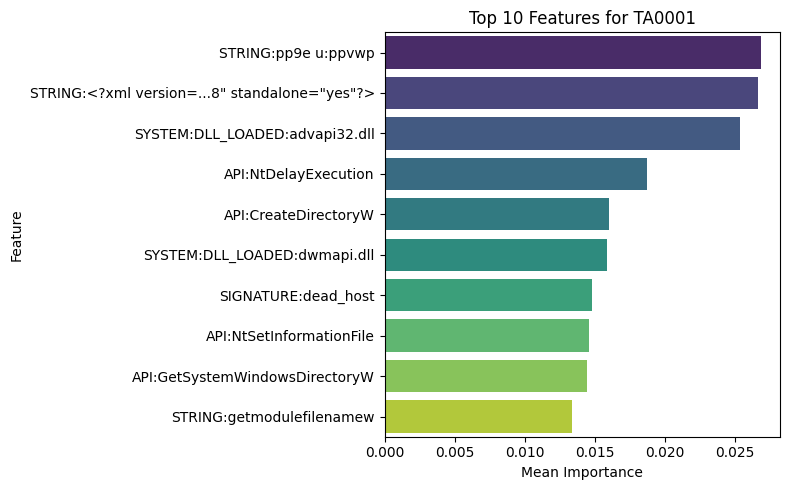

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


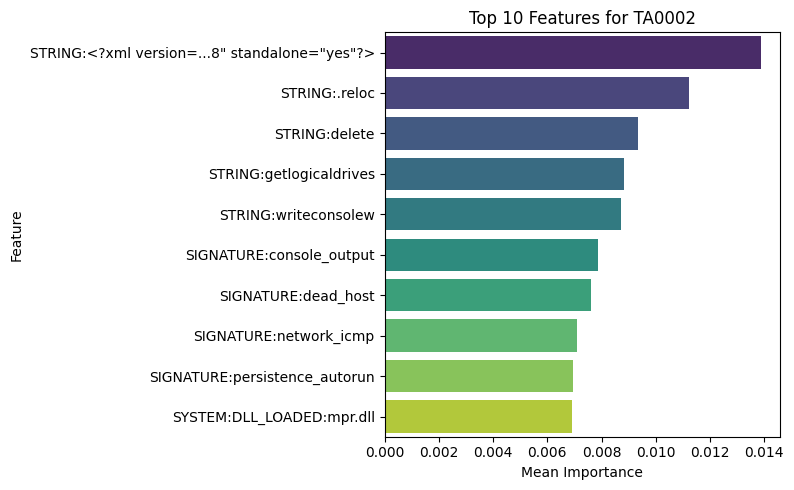

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


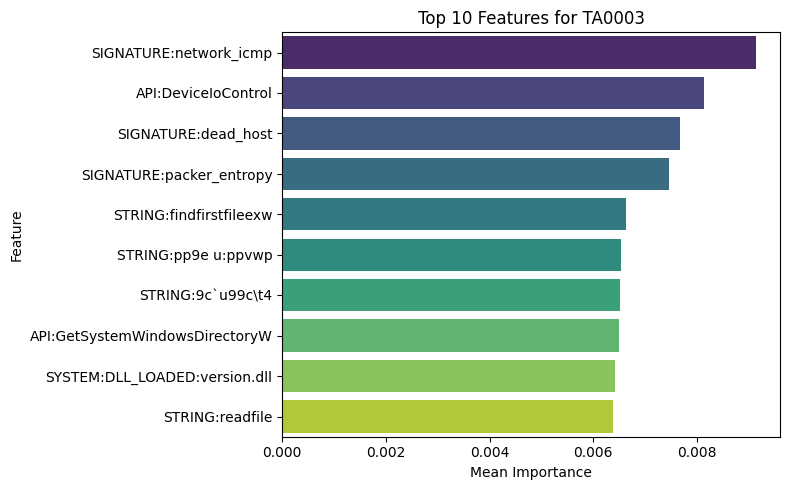

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


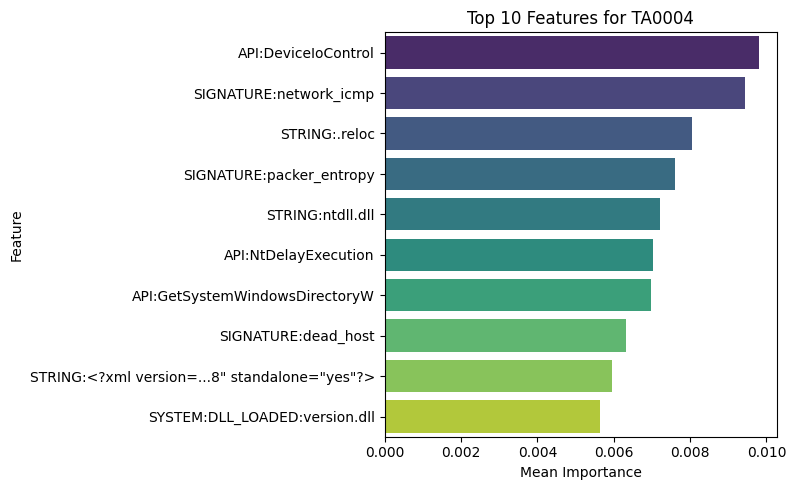

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


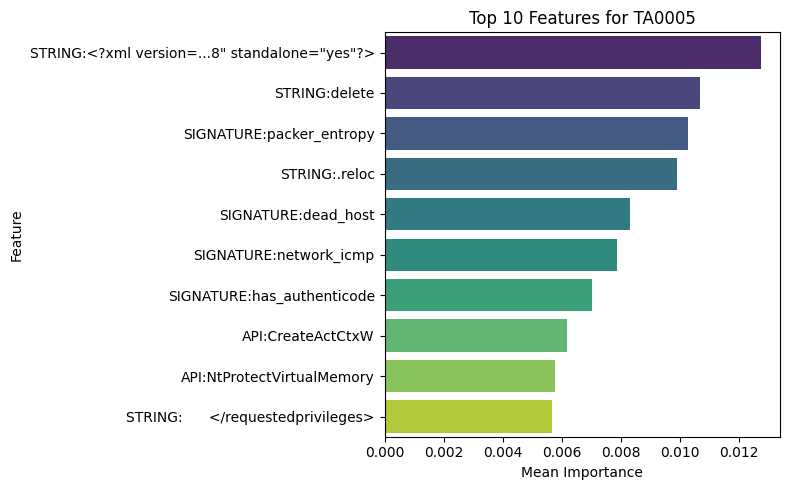

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


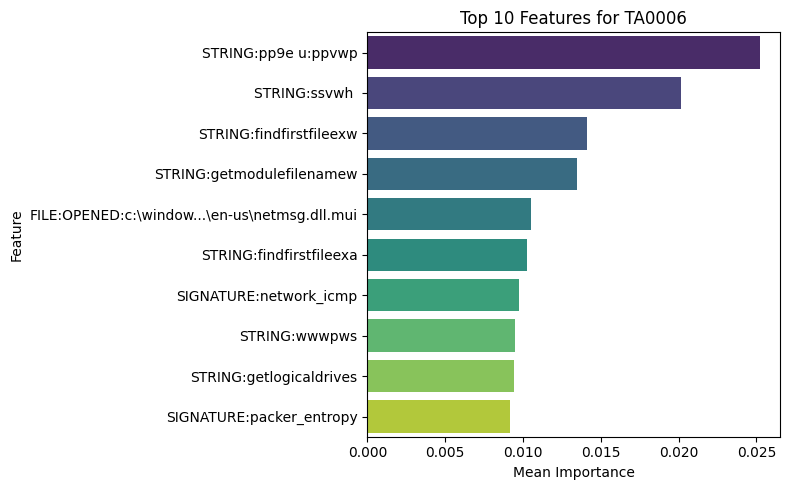

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


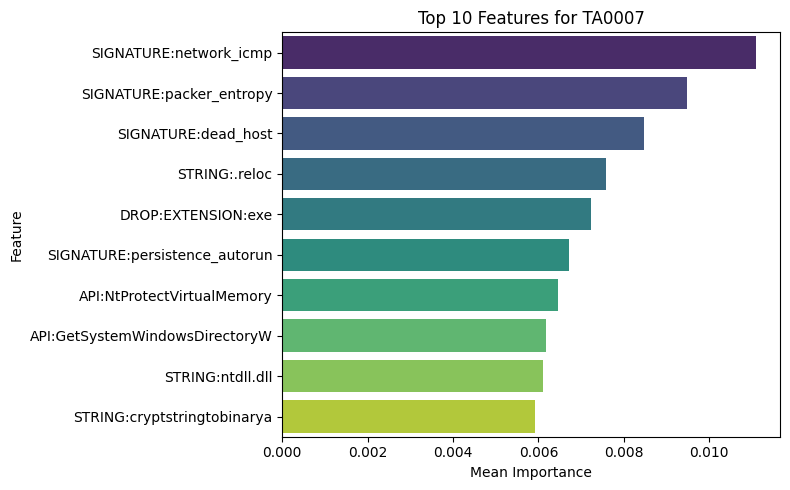

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


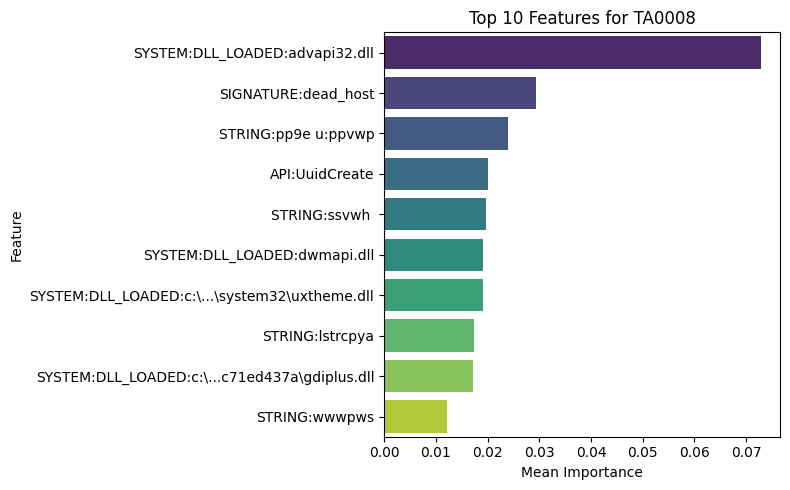

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


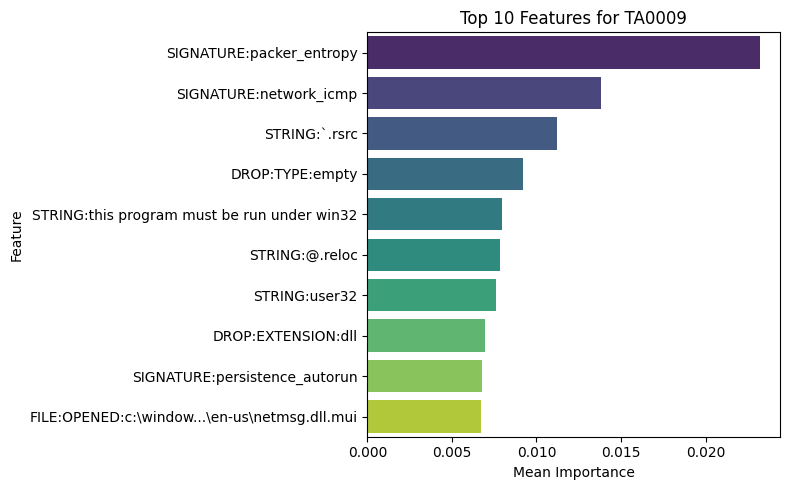

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


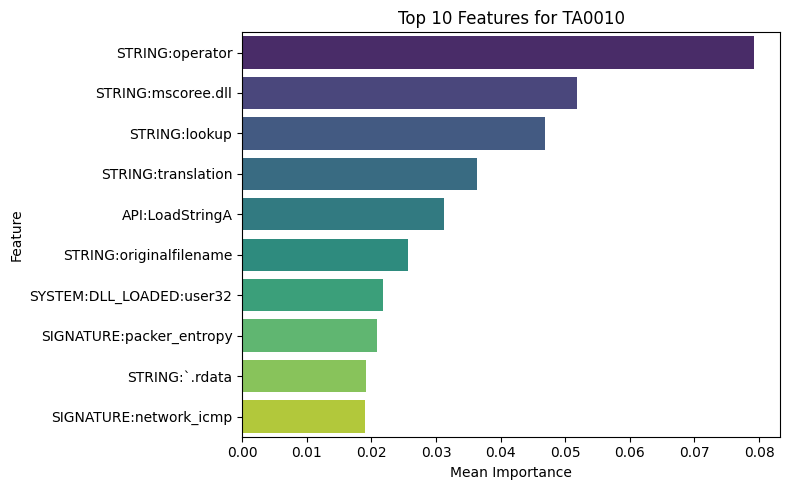

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


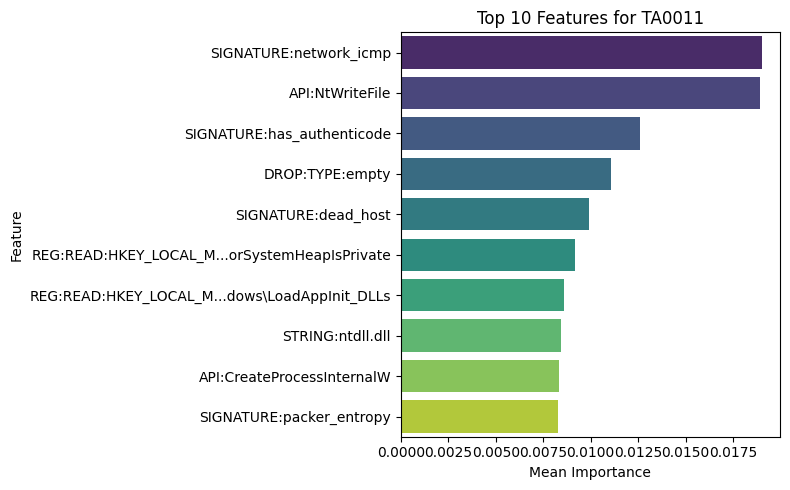

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


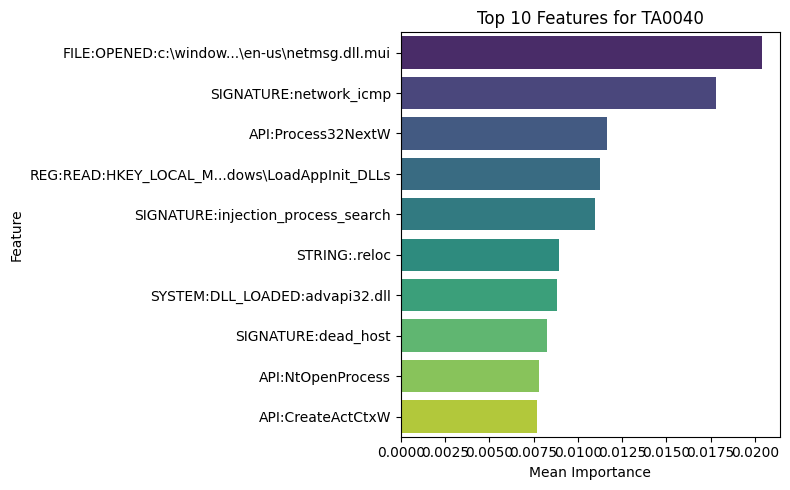

/tmp/ipykernel_1096354/1808816048.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')


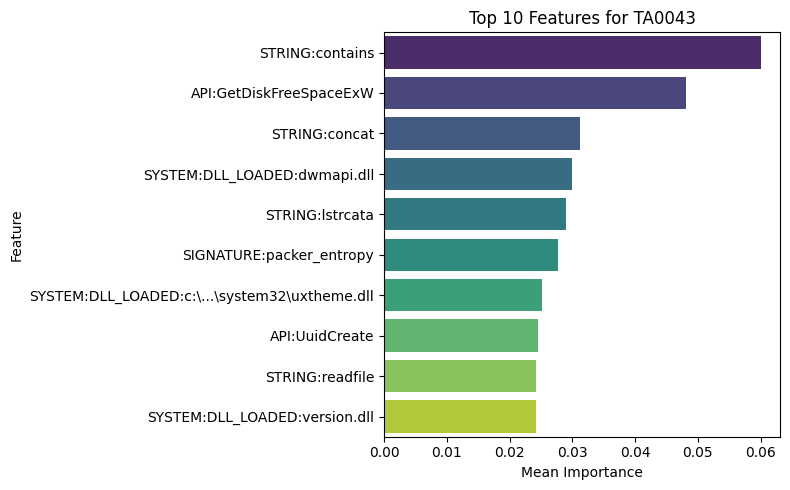

In [ ]:
top_k = 10  # Top-k features per tactic
unique_tactics = tactic_feature_importance['Tactic'].unique()

for tactic in unique_tactics:
    subset = tactic_feature_importance[tactic_feature_importance['Tactic'] == tactic]
    top_features = subset.sort_values('Importance', ascending=False).head(top_k)

    plt.figure(figsize=(8, 5))
    sns.barplot(data=top_features, y='Feature', x='Importance', palette='viridis')
    plt.title(f'Top {top_k} Features for {tactic}')
    plt.xlabel('Mean Importance')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()


In [72]:
unique_tactics

array(['TA0001', 'TA0002', 'TA0003', 'TA0004', 'TA0005', 'TA0006',
       'TA0007', 'TA0008', 'TA0009', 'TA0010', 'TA0011', 'TA0040',
       'TA0043'], dtype=object)

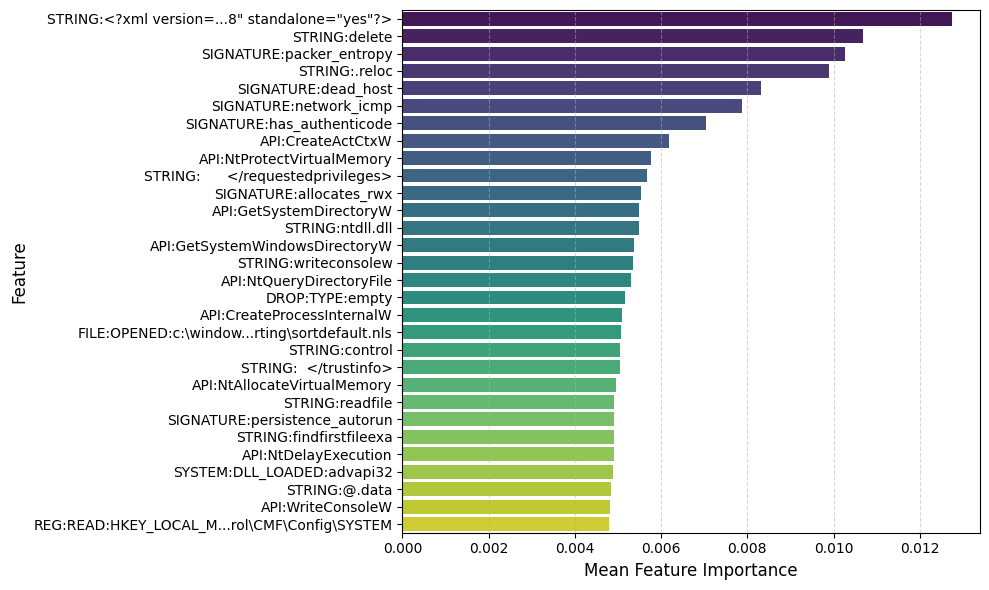

In [88]:
# Parameters
selected_tactic = 'TA0005'  # defense evasion, Specify the tactic to analyse
top_k = 30  # Number of top features to visualise

# Filter and rank features by importance
subset = tactic_feature_importance[tactic_feature_importance['Tactic'] == selected_tactic]
top_features = subset.sort_values(by='Importance', ascending=False).head(top_k)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    hue='Feature',             # Assign 'Feature' to hue
    palette='viridis',
    dodge=False,               # Disable offsetting
    legend=False               # Suppress automatic legend
)
#plt.title(f'Top {top_k} Features Contributing to Tactic {selected_tactic}', fontsize=14)
plt.xlabel('Mean Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save to file
output_folder = "results"
plt.savefig(os.path.join(output_folder, "TA0005_top30_features.png"), format='png', dpi=300)
plt.savefig(os.path.join(output_folder, "TA0005_top30_features.pdf"), format='pdf')


plt.show()


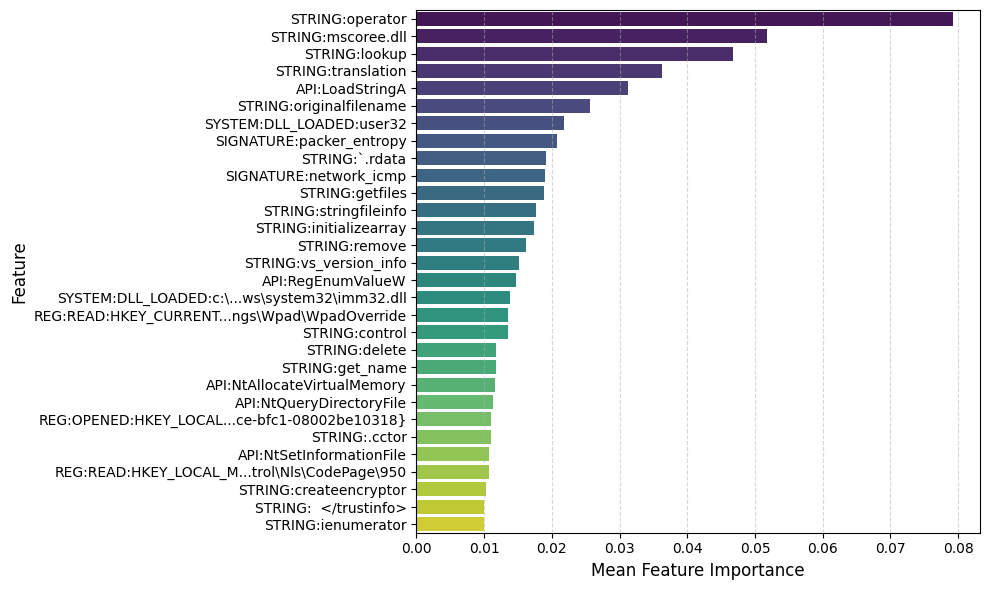

In [89]:
# Parameters
selected_tactic = 'TA0010'  # exfiltration, Specify the tactic to analyse
top_k = 30  # Number of top features to visualise

# Filter and rank features by importance
subset = tactic_feature_importance[tactic_feature_importance['Tactic'] == selected_tactic]
top_features = subset.sort_values(by='Importance', ascending=False).head(top_k)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    hue='Feature',             # Assign 'Feature' to hue
    palette='viridis',
    dodge=False,               # Disable offsetting
    legend=False               # Suppress automatic legend
)
#plt.title(f'Top {top_k} Features Contributing to Tactic {selected_tactic}', fontsize=14)
plt.xlabel('Mean Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save to file
output_folder = "results"
plt.savefig(os.path.join(output_folder, "TA0010_top30_features.png"), format='png', dpi=300)
plt.savefig(os.path.join(output_folder, "TA0010_top30_features.pdf"), format='pdf')


plt.show()


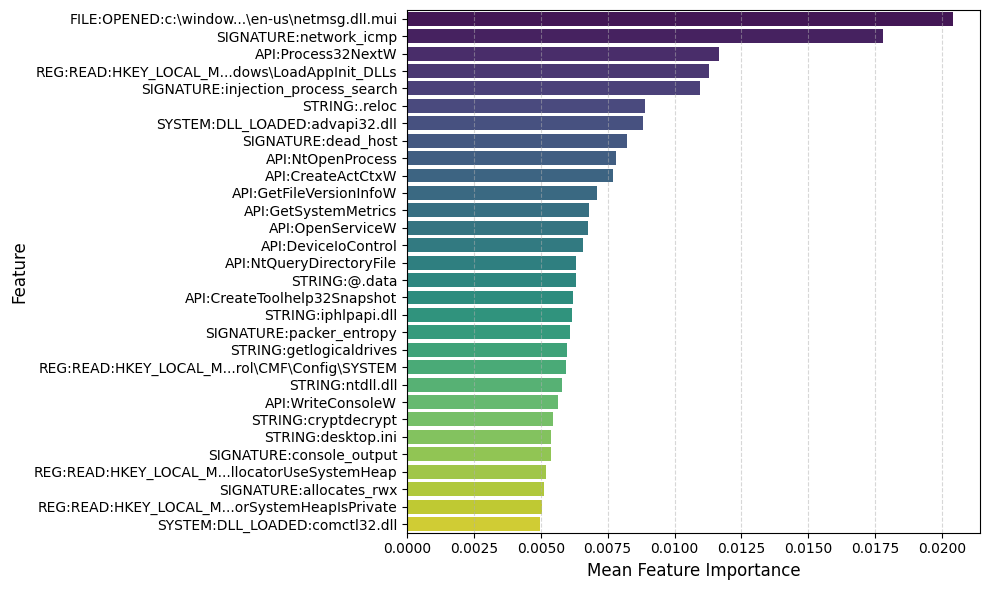

In [90]:
# Parameters
selected_tactic = 'TA0040'  # impact, Specify the tactic to analyse
top_k = 30  # Number of top features to visualise

# Filter and rank features by importance
subset = tactic_feature_importance[tactic_feature_importance['Tactic'] == selected_tactic]
top_features = subset.sort_values(by='Importance', ascending=False).head(top_k)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_features,
    x='Importance',
    y='Feature',
    hue='Feature',             # Assign 'Feature' to hue
    palette='viridis',
    dodge=False,               # Disable offsetting
    legend=False               # Suppress automatic legend
)
#plt.title(f'Top {top_k} Features Contributing to Tactic {selected_tactic}', fontsize=14)
plt.xlabel('Mean Feature Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()

# Save to file
output_folder = "results"
plt.savefig(os.path.join(output_folder, "TA0040_top30_features.png"), format='png', dpi=300)
plt.savefig(os.path.join(output_folder, "TA0040_top30_features.pdf"), format='pdf')


plt.show()


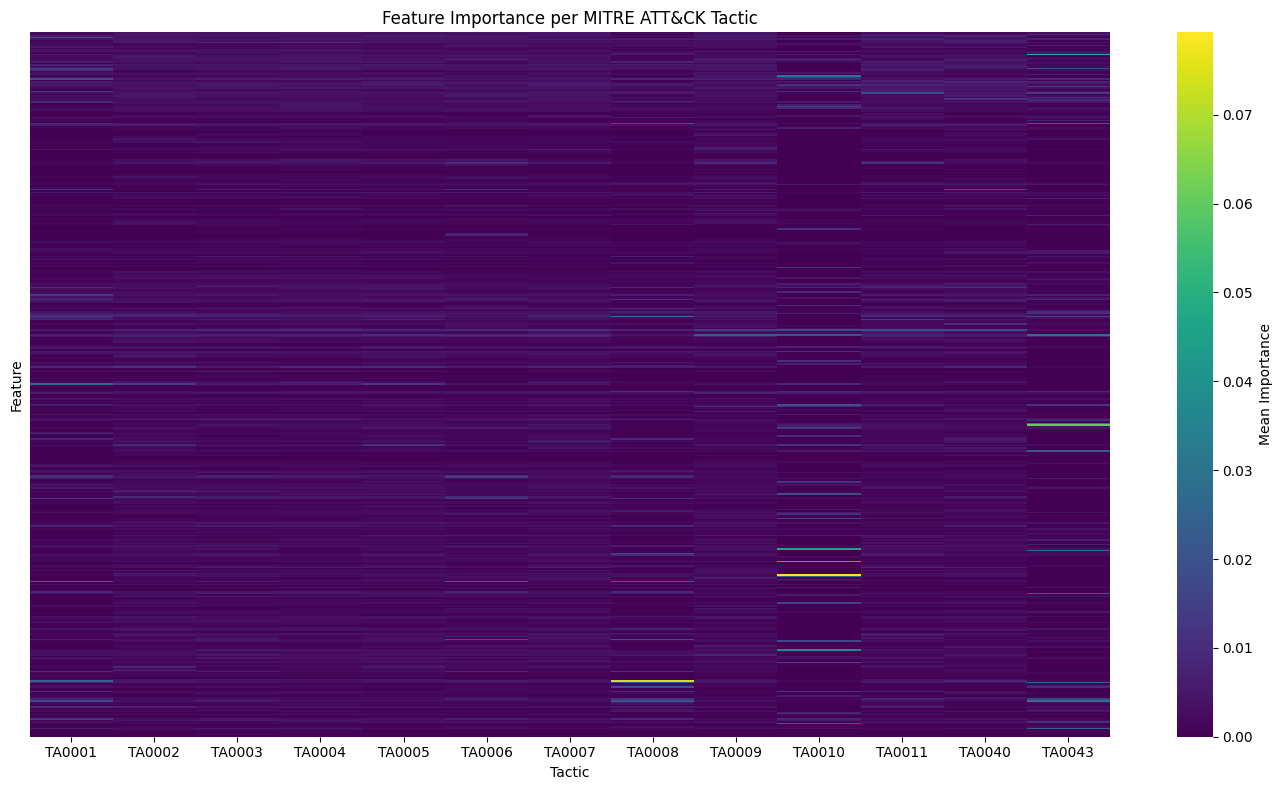

In [91]:
pivot = tactic_feature_importance.pivot(index='Feature', columns='Tactic', values='Importance').fillna(0)

plt.figure(figsize=(14, 8))
sns.heatmap(pivot, cmap='viridis', xticklabels=True, yticklabels=False, cbar_kws={'label': 'Mean Importance'})
plt.title('Feature Importance per MITRE ATT&CK Tactic')
plt.xlabel('Tactic')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


The high dimensionality of features combined with a sparse importance distribution makes the heatmap difficult to interpret. To improve readability and preserve the analytical value, we only retain the top k most important features for each tactic. This preserves interpretability while still reflecting key patterns.

/tmp/ipykernel_1096354/1192622088.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda df: df.sort_values('Importance', ascending=False).head(top_k))


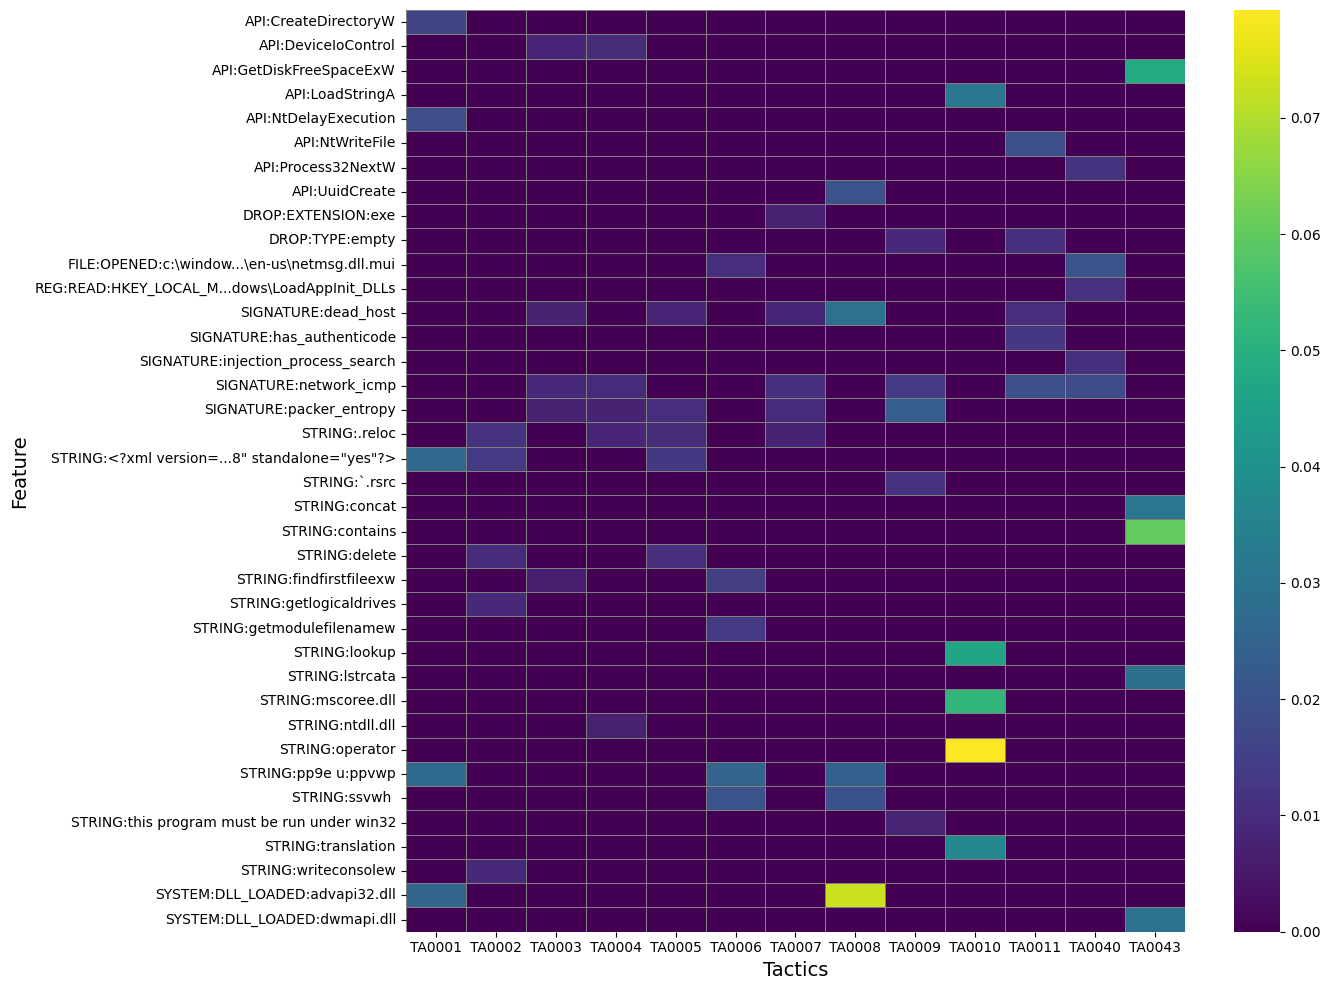

In [94]:
top_k = 5
top_features_all = (
    tactic_feature_importance
    .groupby('Tactic', group_keys=False)
    .apply(lambda df: df.sort_values('Importance', ascending=False).head(top_k))
)

pivot_df = top_features_all.pivot(index='Feature', columns='Tactic', values='Importance').fillna(0)

plt.figure(figsize=(14, 10))
sns.heatmap(pivot_df, cmap='viridis', linewidths=0.5, linecolor='grey')
#plt.title('Top Features per MITRE ATT&CK Tactic')
plt.xlabel('Tactics', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()

output_folder = "results"
plt.savefig(os.path.join(output_folder, "heatmap_top5_features_per_tactic_heatmap.png"), format='png', dpi=300)
plt.savefig(os.path.join(output_folder, "heatmap_top5_features_per_tactic_heatmap.pdf"), format='pdf')
plt.show()


Table of Top Features per Tactic

A concise table listing the top-k most important features for each tactic, useful for the results or appendix.

In [95]:
top_k = 5
top_features_table = (
    tactic_feature_importance
    .sort_values(['Tactic', 'Importance'], ascending=[True, False])
    .groupby('Tactic')
    .head(top_k)
    .reset_index(drop=True)
)
top_features_table.head(50)

,Tactic,Feature,Importance
0,TA0001,STRING:pp9e u:ppvwp,0.026875
1,TA0001,"STRING:<?xml version=...8"" standalone=""yes""?>",0.026625
2,TA0001,SYSTEM:DLL_LOADED:advapi32.dll,0.025339
3,TA0001,API:NtDelayExecution,0.018731
4,TA0001,API:CreateDirectoryW,0.016046
5,TA0002,"STRING:<?xml version=...8"" standalone=""yes""?>",0.013886
6,TA0002,STRING:.reloc,0.011238
7,TA0002,STRING:delete,0.009360
8,TA0002,STRING:getlogicaldrives,0.008835
9,TA0002,STRING:writeconsolew,0.008732


In [97]:
top_features_table.shape

(65, 3)

In [ ]:
#top_features_table.to_csv('results/top5_features_per_tactic.csv', index=False)

### Label cardinality

**What is Label Cardinality?**

**Label Cardinality** is a key metric in multi-label classification that quantifies the **average number of labels per sample**.

It helps understand how dense the label space is — i.e., whether each instance is typically associated with few or many labels.

---

**Mathematical Definition**

Given a dataset with:
- $N$ samples
- $Y_i \subseteq \mathcal{L}$ = the set of labels assigned to instance $i$

The **Label Cardinality (LC)** is defined as:

$$
\text{Label Cardinality} = \frac{1}{N} \sum_{i=1}^{N} |Y_i|
$$

Where:
- $|Y_i|$ is the number of labels assigned to the $i^{\text{th}}$ sample
- $N$ is the total number of samples

---


In [66]:
label_cardinality = Y_train.sum(axis=1).mean()
print("Average Label Cardinality Train:", label_cardinality)

Average Label Cardinality Train: 19.39163498098859


In [67]:
label_cardinality = Y_test.sum(axis=1).mean()
print("Average Label Cardinality Test:", label_cardinality)

Average Label Cardinality Test: 22.163636363636364


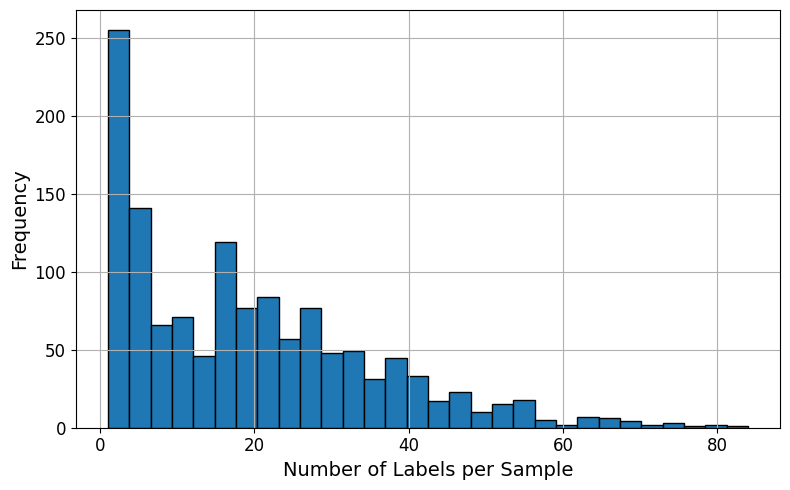

In [74]:
# Compute label cardinality per sample
label_counts = Y_train_arr.sum(axis=1)

# Create plot
plt.figure(figsize=(8, 5))
plt.hist(label_counts, bins=30, edgecolor='black')

# Increase font sizes
#plt.title("Distribution of Label Cardinality per Sample for Train Set", fontsize=16)
plt.xlabel("Number of Labels per Sample", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()

# Save as PDF and PNG
plt.savefig("results/train_label_cardinality_distribution.pdf", format="pdf")
plt.savefig("results/train_label_cardinality_distribution.png", format="png", dpi=300)

# Show plot
plt.show()


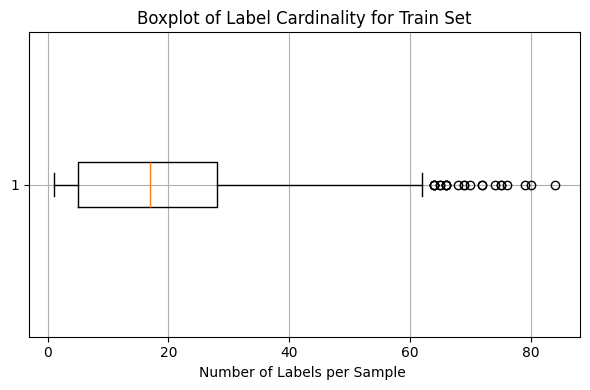

In [69]:
plt.figure(figsize=(6, 4))
plt.boxplot(label_counts, vert=False)
plt.title("Boxplot of Label Cardinality for Train Set")
plt.xlabel("Number of Labels per Sample ")
plt.grid(True)
plt.tight_layout()
plt.show()


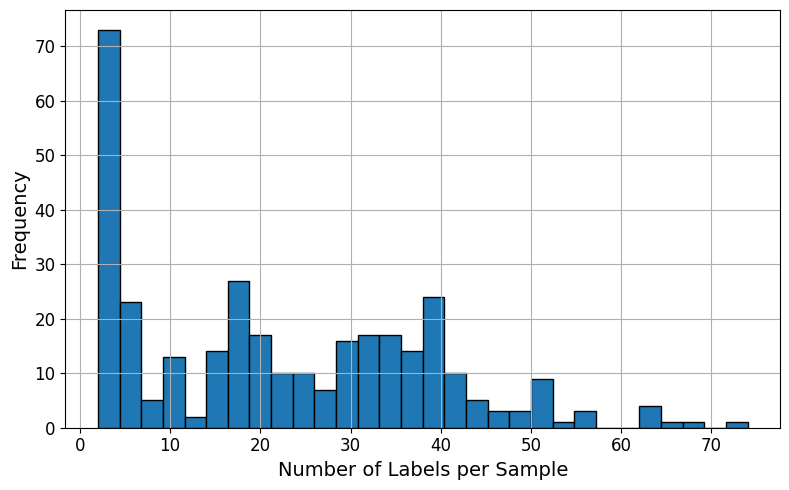

In [75]:
# Compute label cardinality per sample
label_counts = Y_test_arr.sum(axis=1)

# Create plot
plt.figure(figsize=(8, 5))
plt.hist(label_counts, bins=30, edgecolor='black')

# Increase font sizes
#plt.title("Distribution of Label Cardinality per Sample for Train Set", fontsize=16)
plt.xlabel("Number of Labels per Sample", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.grid(True)
plt.tight_layout()

# Save as PDF and PNG
plt.savefig("results/test_label_cardinality_distribution.pdf", format="pdf")
plt.savefig("results/test_label_cardinality_distribution.png", format="png", dpi=300)

# Show plot
plt.show()


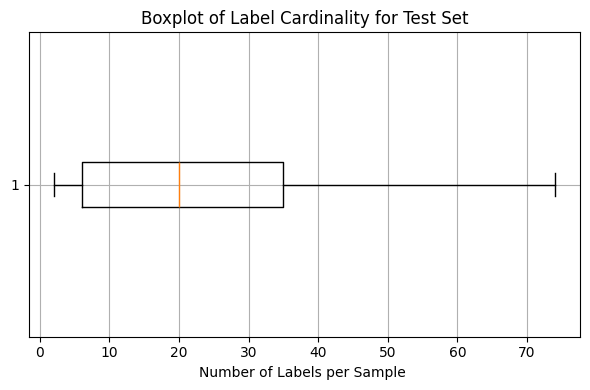

In [71]:
plt.figure(figsize=(6, 4))
plt.boxplot(label_counts, vert=False)
plt.title("Boxplot of Label Cardinality for Test Set")
plt.xlabel("Number of Labels per Sample ")
plt.grid(True)
plt.tight_layout()
plt.show()


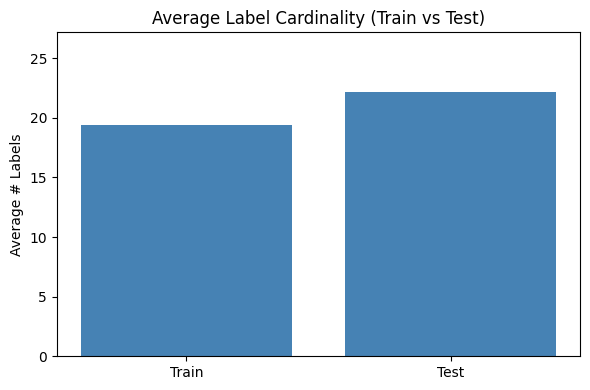

In [73]:
alc_values = [Y_train_arr.sum(axis=1).mean(), Y_test_arr.sum(axis=1).mean()]
labels = ['Train', 'Test']

plt.figure(figsize=(6, 4))
plt.bar(labels, alc_values, color='steelblue')
plt.title("Average Label Cardinality (Train vs Test)")
plt.ylabel("Average # Labels")
plt.ylim(0, max(alc_values) + 5)
plt.tight_layout()
plt.show()


## Logistic Regression

In [ ]:
# Train with Logistic Regression using scikit-multilearn BinaryRelevance
start_time = time.time()

clf_log = BinaryRelevance(classifier=LogisticRegression(solver='liblinear', max_iter=500))
clf_log.fit(X_train_arr, Y_train_arr)

end_time = time.time()
print('Training time:', round(end_time - start_time, 2), 'seconds')

# Predict probabilities
Y_test_pred_log = clf_log.predict_proba(X_test_arr).toarray()
print(Y_test_pred_log)


Training time: 3.04 seconds
[[2.55659757e-04 6.48343639e-05 7.42689800e-05 ... 5.29171393e-05
  2.27502437e-05 1.56369202e-04]
 [2.10396932e-04 3.90058591e-04 7.10184751e-05 ... 1.16169875e-04
  4.47623247e-05 1.53928393e-04]
 [4.21102538e-04 5.17170329e-03 1.91089339e-04 ... 4.56050759e-04
  4.57950091e-04 3.02618422e-04]
 ...
 [3.18455137e-04 1.97151460e-03 5.49570066e-05 ... 8.73776862e-06
  5.98776032e-06 1.25801731e-05]
 [3.54232989e-04 9.39173635e-03 2.78745355e-04 ... 5.23159119e-04
  5.63918549e-04 5.74569516e-04]
 [2.47825242e-04 1.14777918e-01 2.30039288e-04 ... 3.29738143e-04
  2.21875928e-04 1.76513793e-04]]


In [28]:
k_vals = [1, 2, 3, 5, 10, 20, 30, 40, 50]

df_metrics3 = evaluate_at_k(
    Y_true=Y_test_arr,
    Y_scores=Y_test_pred_log,
    k_values=k_vals,
    precision_fn=precision_at_k,
    recall_fn=recall_at_k,
    f1_fn=f1_at_k,
    ndcg_fn=ndcg_at_k,
    coverage_fn=coverage_at_k
)

Results of Precision, Recall, F1, nDCG, and Coverage for different values of k


,k,Precision,Recall,F1,nDCG,Coverage
0,1,93.64,11.93,21.17,93.64,9.84
1,2,91.36,23.05,36.81,91.88,17.21
2,3,85.96,29.41,43.83,90.12,22.13
3,5,77.39,37.16,50.21,88.11,30.33
4,10,64.70,49.32,55.97,84.48,41.80
5,20,52.12,64.34,57.59,80.85,53.69
6,30,44.17,73.43,55.16,80.37,61.89
7,40,38.66,80.46,52.23,81.42,72.13
8,50,33.92,84.82,48.46,83.06,83.20


## MLP

In [ ]:
start_time = time.time()
clf = MLPClassifier(hidden_layer_sizes=(4300,), activation='tanh')
clf.fit(X_train_arr, Y_train_arr)
end_time = time.time()
print('Training time:', round(end_time - start_time, 2), 'seconds')

Training time: 77.34 seconds


/mnt/storage/faithfulco/python_packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [30]:
# Predict probabilities
Y_test_pred_mlp = clf.predict_proba(X_test_arr)
print(Y_test_pred_mlp)

[[1.92228304e-09 4.35622192e-11 1.40994729e-11 ... 2.25568165e-09
  3.58216628e-09 2.31149957e-09]
 [1.07574583e-10 3.65968894e-11 2.30539831e-13 ... 3.38678574e-10
  4.66486801e-11 2.74963126e-11]
 [2.37930380e-10 3.41145768e-06 2.20335062e-12 ... 2.81986820e-09
  1.84406969e-08 3.64448814e-11]
 ...
 [1.35997402e-07 3.28174402e-03 7.98945592e-09 ... 6.00995571e-07
  8.81671567e-08 7.53658620e-08]
 [7.21915812e-07 5.24594030e-03 2.50829572e-07 ... 7.69188908e-07
  7.47373643e-07 7.06265100e-06]
 [9.21288204e-10 9.69830492e-01 4.60207059e-10 ... 2.16698965e-08
  3.13816603e-08 2.74346626e-08]]


In [31]:
k_vals = [1, 2, 3, 5, 10, 20, 30, 40, 50]

df_metrics = evaluate_at_k(
    Y_true=Y_test_arr,
    Y_scores=Y_test_pred_mlp,
    k_values=k_vals,
    precision_fn=precision_at_k,
    recall_fn=recall_at_k,
    f1_fn=f1_at_k,
    ndcg_fn=ndcg_at_k,
    coverage_fn=coverage_at_k
)

Results of Precision, Recall, F1, nDCG, and Coverage for different values of k


,k,Precision,Recall,F1,nDCG,Coverage
0,1,86.97,11.49,20.30,86.97,15.16
1,2,85.15,22.27,35.31,85.56,23.77
2,3,79.09,28.16,41.53,83.37,30.74
3,5,70.55,35.28,47.04,81.29,35.25
4,10,60.27,47.03,52.84,78.93,43.03
5,20,49.29,61.34,54.66,76.39,57.79
6,30,42.26,70.58,52.87,76.53,67.62
7,40,37.23,77.84,50.37,77.87,77.46
8,50,33.15,82.89,47.35,79.93,84.84
